In [1]:
from manim import *

Manim Community v0.18.1

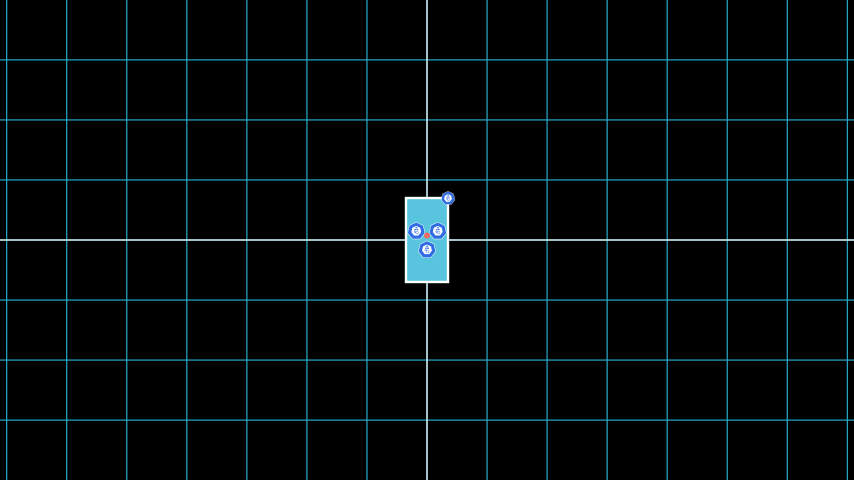

In [20]:
%%manim -ql -v ERROR Test 

class Test(Scene):
    def construct(self):
        plane = self.add(NumberPlane())
        rect = Rectangle(width=1, height=2, fill_opacity=1, fill_color=BLUE).scale(0.7)
        icon = SVGMobject("../../assets/icons/kubernets/infrastructure_components/unlabeled/node.svg",width=1)
        icon.scale_to_fit_width(rect.width/3).move_to(rect.get_corner(UR))
        node1 = VGroup(rect, icon)
        self.play(FadeIn(node1))

        # Utwórz ikonę węzła
        icon = SVGMobject("../../assets/icons/kubernets/infrastructure_components/unlabeled/node.svg",width=1)
        # Rozmieść ikony w wierzchołkach trójkąta równobocznego
        # Chcemy, aby odległość między wierzchołkami była trochę większa niż szerokość ikon
        # Utwórz trójkąt równoboczny
        triangle = RegularPolygon(n=3,fill_opacity=0,start_angle=PI/6).scale(0.7)
        # triangle.set_fill(opacity=0)
        # triangle.set_stroke(width=0)  # Ukryj krawędzie
        # Powiel i rozmieść ikonę w wierzchołkach trójkąta
        point = Circle(radius=1,fill_color=BLUE).scale(0.1)
        manypods = VGroup(*[
            icon.copy().move_to(triangle.get_vertices()[i])
            for i in range(3)
        ],point )
        manypods.scale_to_fit_width(node1.width*0.8)
        manypods.move_to(node1[0].get_center())
        self.add(manypods)

## Equidistant points

Manim Community v0.18.1

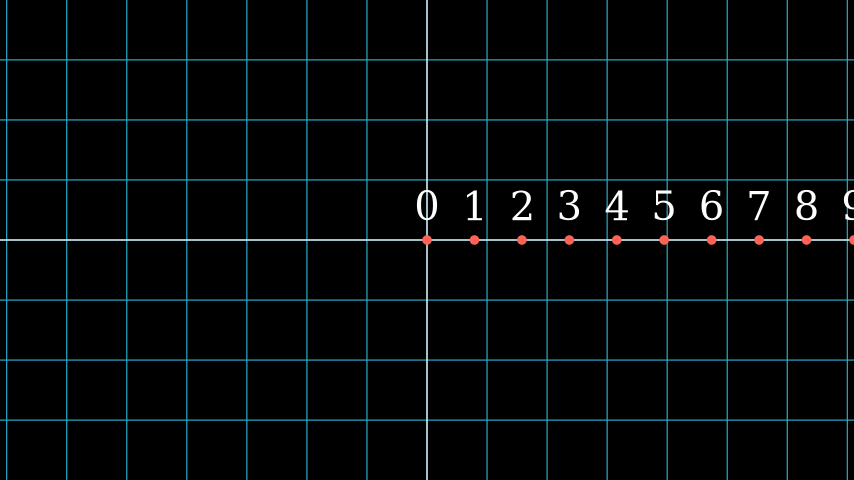

In [23]:
%%manim -ql -v ERROR EquidistantPoints

class EquidistantPoints(Scene):
    def construct(self):
        plane = self.add(NumberPlane())        
        # Define the number of points and the x-axis range
        num_points = 10
        x_min = 0
        x_max = config.frame_width / 2  # maximal coordinate (half the width of the frame)

        # Calculate the x positions of the points
        x_positions = np.linspace(x_min, x_max, num_points)

        # Create and position the dots at those x positions
        dots = VGroup(*[Dot(np.array([x, 0, 0]), color=RED) for x in x_positions])

        # Add the dots to the scene
        self.add(dots)

        # Optional: add labels or other elements if needed
        for i, dot in enumerate(dots):
            label = Text(str(i)).next_to(dot, UP)
            self.add(label)

## Side by Side rectangles

Manim Community v0.18.1

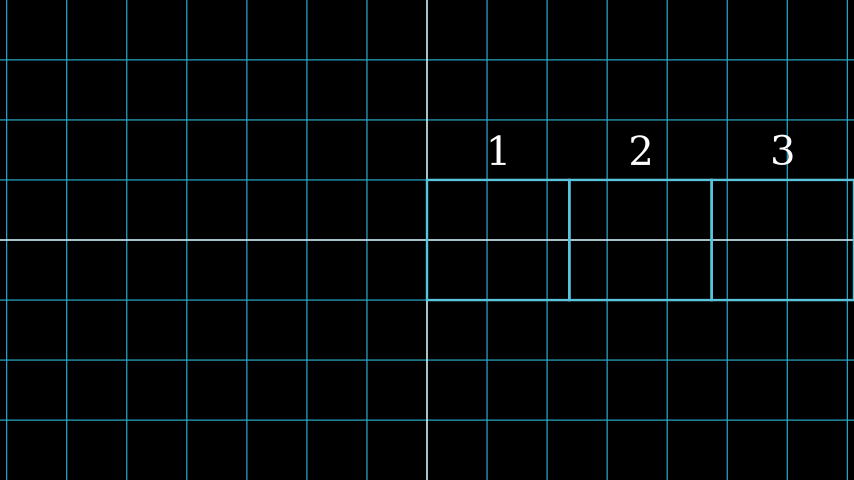

In [30]:
%%manim -ql -v ERROR SideBySideRectangles
from manim import *

class SideBySideRectangles(Scene):
    def construct(self):
        plane = self.add(NumberPlane())    
        # Define the number of rectangles and the x-axis range
        num_rectangles = 3
        x_max = config.frame_width / 2  # Maximal coordinate (half the width of the frame)
        total_width = x_max

        # Calculate the width of each rectangle
        rect_width = total_width / num_rectangles
        rect_height = 2  # You can adjust the height as needed

        # Create the rectangles
        rectangles = VGroup(*[
            Rectangle(width=rect_width, height=rect_height, color=BLUE)
            for _ in range(num_rectangles)
        ])

        # Arrange the rectangles side by side
        rectangles.arrange(RIGHT, buff=0)  # `buff=0` ensures no space between rectangles

        # Move the group to start at the origin
        rectangles.shift(rectangles.width/2*RIGHT)

        # Add the rectangles to the scene
        self.add(rectangles)

        # Optional: add labels or other elements if needed
        for i, rect in enumerate(rectangles):
            label = Text(str(i+1)).next_to(rect, UP)
            self.add(label)


## Equally spaced rectangles

Manim Community v0.18.1

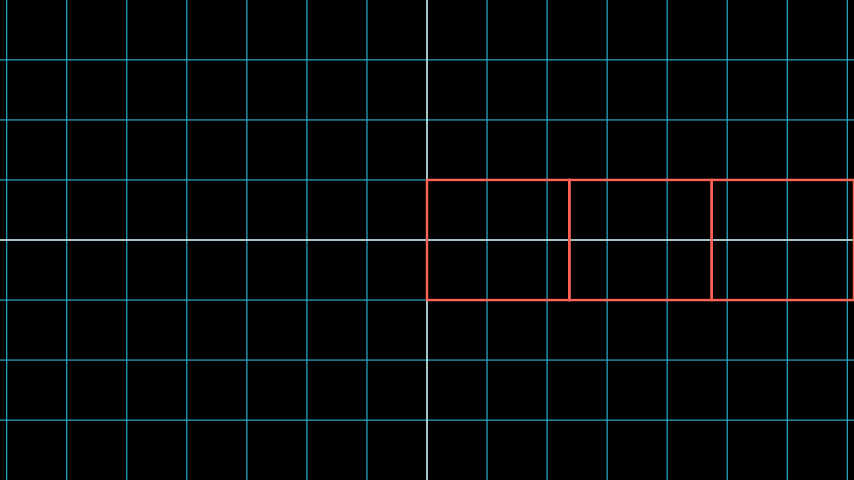

In [35]:
%%manim -ql -v ERROR EquallySpacedRectangles

class EquallySpacedRectangles(Scene):
    def construct(self):
        plane = self.add(NumberPlane())        
        # Define the number of rectangles and the x-axis range
        num_rectangles = 3
        rect_width = 1
        rect_height = 2
        x_min = 0
        x_max = config.frame_width / 2  # Maximal coordinate (half the width of the frame)
        total_width = x_max - x_min

        # create bounding rectangles, they won't be placed on a plane
        # smaller rectangles will be placed at their centers
        bounding_rectangles = VGroup(*[
            Rectangle(width=total_width/num_rectangles, height=2, color=RED)
            for k in range(num_rectangles)
        ])
        bounding_rectangles.arrange(RIGHT, buff=0).shift((bounding_rectangles.width/2+x_min)*RIGHT)


        # Create and position the rectangles at those x positions
        rectangles = VGroup(*[
            Rectangle(width=rect_width, height=rect_height, color=BLUE).move_to(bounding_rectangles[x].get_center())
            for x in range(num_rectangles)
        ])

        # Add the rectangles to the scene
        self.add(bounding_rectangles,rectangles)

        # # Optional: add labels or other elements if needed
        # for i, rect in enumerate(rectangles):
        #     label = Text(str(i+1)).next_to(rect, UP)
        #     self.add(label)


In [ ]:
%%manim -ql -v ERROR Test 

from manim import *

class Test(Scene):
    def construct(self):
        # Header for the block
        header = Text("Important Points", font_size=48)
        
        # List of items
        items = [
            "First important point.",
            "Second important point.",
            "Third important point.",
            "Fourth important point."
        ]

        # Create text objects for each item
        item_texts = [Text(item, font_size=36) for item in items]

        # Arrange items vertically below the header
        item_group = VGroup(*item_texts).arrange(DOWN, aligned_edge=LEFT, buff=0.5)

        # Create a rounded rectangle to surround the item group
        rectangle_padding = 0.5
        surrounding_rectangle = RoundedRectangle(
            corner_radius=0.2,
            width=item_group.width + 2 * rectangle_padding,
            height=item_group.height + header.height + 2 * rectangle_padding
        )

        # Position the rectangle at the top edge
        surrounding_rectangle.to_edge(UP)
        
        # Position the header below the top edge of the rectangle
        header.next_to(surrounding_rectangle.get_top(), DOWN, buff=0.3)
        
        # Position the item group below the header
        item_group.next_to(header, DOWN, buff=0.5)
        
        # Create a yellow underline for the header
        underline = Line(
            start=header.get_left() - [0.1, 0, 0], 
            end=header.get_right() + [0.1, 0, 0], 
            color=YELLOW, 
            stroke_width=4
        )
        underline.next_to(header, DOWN, buff=0.1)
        
        # Align the left edge of the underline with the left edge of the rectangle
        underline.align_to(surrounding_rectangle, LEFT)

        # Add header, underline, and rectangle to the scene
        self.play(Write(header))
        self.play(Create(underline))
        self.play(Create(surrounding_rectangle))

        # Animate each item appearing one by one within the rectangle
        for item_text in item_texts:
            self.play(FadeIn(item_text, shift=RIGHT))
            self.wait(0.5)  # Wait a bit before the next item appears

        # Hold the final scene for a moment
        self.wait(2)


Manim Community v0.18.1

In [13]:
%%manim -ql -v ERROR Test 

from manim import *

class Test(Scene):
    def construct(self):
        # Header for the block
        header = Text("Important Points", font_size=48)
        
        # List of items
        items = [
            "First important point.",
            "Second important point.",
            "Third important point.",
            "Fourth important point."
        ]

        # Create text objects for each item
        item_texts = [Text(item, font_size=36) for item in items]

        # Arrange items vertically below the header
        item_group = VGroup(*item_texts).arrange(DOWN, aligned_edge=LEFT, buff=0.5)

        # Create a rounded rectangle to surround the item group
        rectangle_padding = 0.5
        surrounding_rectangle = RoundedRectangle(
            corner_radius=0.2,
            width=item_group.width + 2 * rectangle_padding,
            height=item_group.height + header.height + 2 * rectangle_padding
        )

        # Position the rectangle at the top edge
        surrounding_rectangle.to_edge(UP)
        
        # Position the header below the top edge of the rectangle
        header.next_to(surrounding_rectangle.get_top(), DOWN, buff=0.3)
        
        # Position the item group below the header
        item_group.next_to(header, DOWN, buff=0.5)
        
        # Create a yellow underline for the header
        underline = Line(
            start=header.get_left() - [0.1, 0, 0], 
            end=header.get_right() + [0.1, 0, 0], 
            color=YELLOW, 
            stroke_width=4
        )
        underline.next_to(header, DOWN, buff=0.1)
        
        # Align the left edge of the underline with the left edge of the rectangle
        underline.align_to(surrounding_rectangle, LEFT)

        # Add header, underline, and rectangle to the scene
        self.play(Write(header))
        self.play(Create(underline))
        self.play(Create(surrounding_rectangle))

        # Animate each item appearing one by one within the rectangle
        for item_text in item_texts:
            self.play(FadeIn(item_text, shift=RIGHT))
            self.wait(0.5)  # Wait a bit before the next item appears

        # Hold the final scene for a moment
        self.wait(2)


Manim Community v0.18.1